# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`. 

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report


# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [50]:


housing_df = pd.read_csv(r'C:\Users\jefit\OneDrive\Escritorio\Ironhack\Ironhack candela\Week 2\Labs\lab-ml-and-linear-regression\data\housing.csv')

In [51]:
#Understand the structure of the data

housing_df.head()         # View first few rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [52]:
housing_df.tail()         # View last few rows



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [53]:
housing_df.shape          # (rows, columns)


(20640, 10)

In [54]:
housing_df.columns        # Column names


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [55]:
housing_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [56]:
housing_df.info()         # Data types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [57]:
housing_df.describe()     # Summary statistics for numeric columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

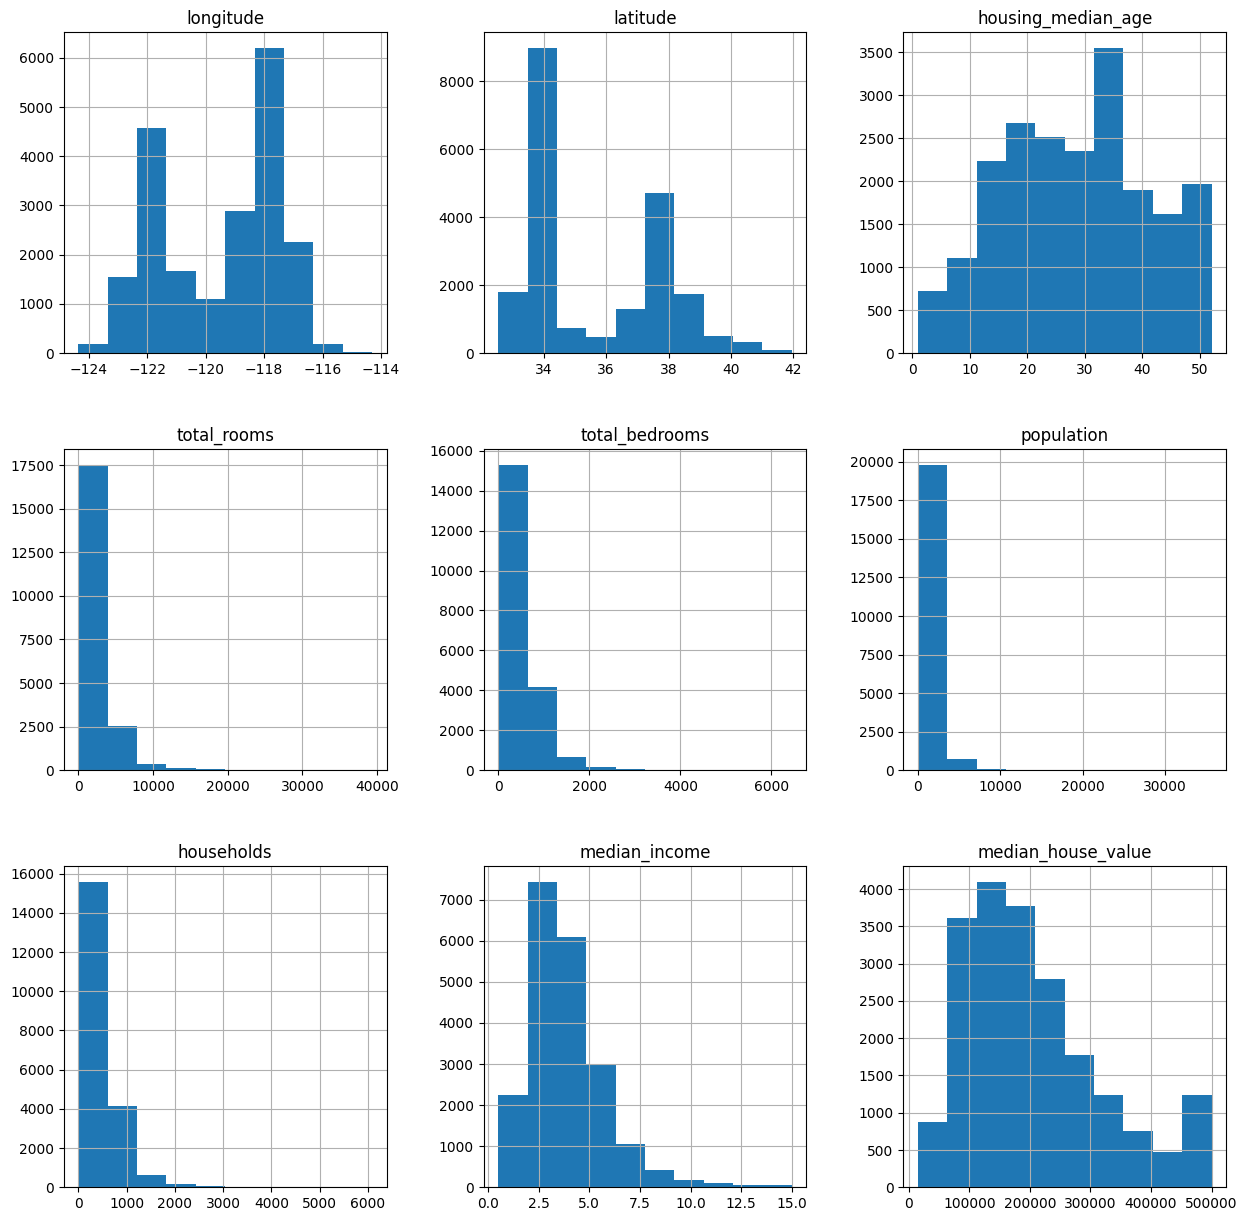

In [58]:
housing_df.select_dtypes(include=np.number).hist(figsize=(15,15))

#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you. 

In [59]:
housing_df.isnull().sum()                # Count missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [60]:
housing_df.dropna(inplace=True)          # Drop missing rows (optional)

2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

In [61]:
# to create the "rooms per household" col:

housing_df = housing_df.assign(
    rooms_per_hh = lambda x: x['total_rooms'] / x['households'])

housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_hh
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853


In [62]:
# to create the "population per household" col:

housing_df = housing_df.assign(
    population_per_hh = lambda x: x['population'] / x['households'])

housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_hh,population_per_hh
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467


In [63]:
# to create the "bedrooms per room" col:

housing_df = housing_df.assign(
    bedrooms_per_room = lambda x: x['total_bedrooms'] / x['total_rooms'])

housing_df.head()

housing_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
rooms_per_hh          float64
population_per_hh     float64
bedrooms_per_room     float64
dtype: object

3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [64]:
top5_highest = housing_df['rooms_per_hh'].nlargest(5)

top5_lowest = housing_df['rooms_per_hh'].nsmallest(5)

top5_highest, top5_lowest


(1914     141.909091
 1979     132.533333
 12447     62.422222
 1913      61.812500
 11862     59.875000
 Name: rooms_per_hh, dtype: float64,
 5916     0.846154
 8219     0.888889
 3126     1.000000
 14818    1.130435
 17820    1.130435
 Name: rooms_per_hh, dtype: float64)

In [ ]:
# Based on the above results, the outliers would be the top 2 values (141.91 & 132.53). On the other hand, the incorrect values are the 2 lowest values (0.846 and 0.889), as a household cannot have less than 1 room.

In [65]:
housing_df.drop(1914, inplace=True) #removing row with index 1914
housing_df.drop(1979, inplace=True) #removing row with index 1979

housing_df.drop(5916, inplace=True) #removing row with index 5916
housing_df.drop(8219, inplace=True) #removing row with index 8219

In [66]:
top5_highest = housing_df['rooms_per_hh'].nlargest(5)

top5_lowest = housing_df['rooms_per_hh'].nsmallest(5)

top5_highest, top5_lowest

(12447    62.422222
 1913     61.812500
 11862    59.875000
 1912     56.269231
 9676     52.848214
 Name: rooms_per_hh, dtype: float64,
 3126     1.000000
 14818    1.130435
 17820    1.130435
 4552     1.260870
 4550     1.378486
 Name: rooms_per_hh, dtype: float64)

# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

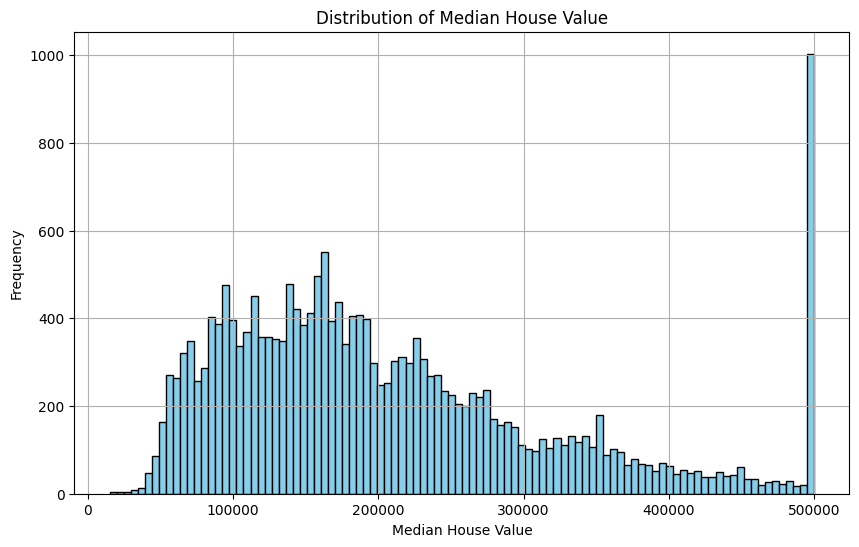

np.int64(1071)

In [ ]:
import matplotlib.pyplot as plt

# Histogram with 100 bins for median_house_value
plt.figure(figsize=(10, 6))
plt.hist(housing_df['median_house_value'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

(housing_df['median_house_value'] > 480000).sum()

2. Check out what variables correlates the most with "median house value"

<Axes: >

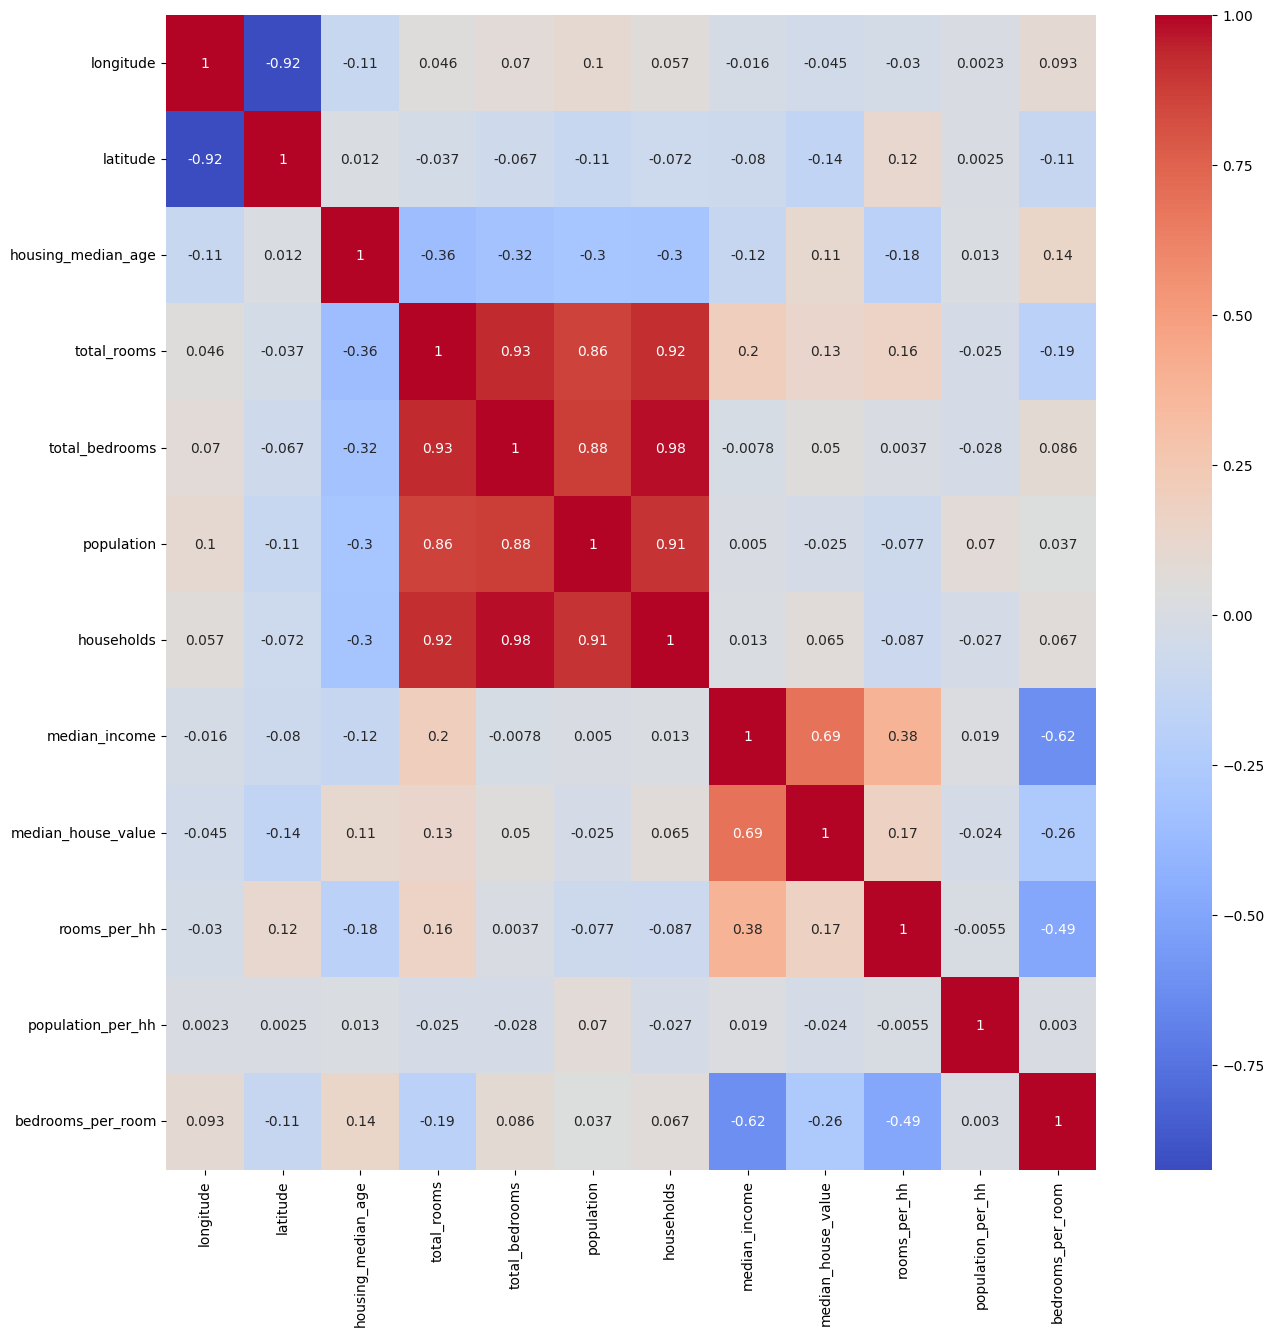

In [71]:
corr = housing_df.corr(numeric_only=True)

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
#Based on the above correlation matrix, we can observe that the column with the 
# highest correlation to "median house value" is "median income", with a correlation value of 0.69

3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

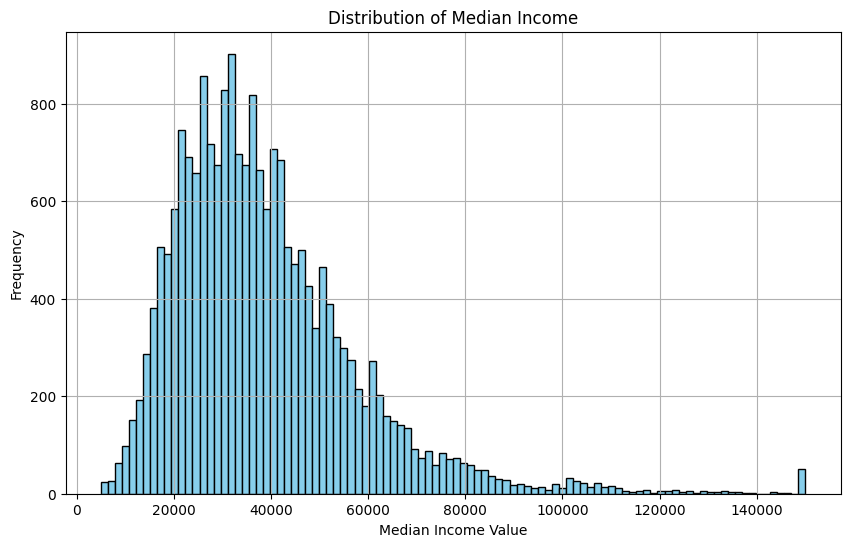

In [75]:
# Histogram with 100 bins for median_house_value
plt.figure(figsize=(10, 6))
plt.hist(housing_df['median_income']*10000, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Median Income')
plt.xlabel('Median Income Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

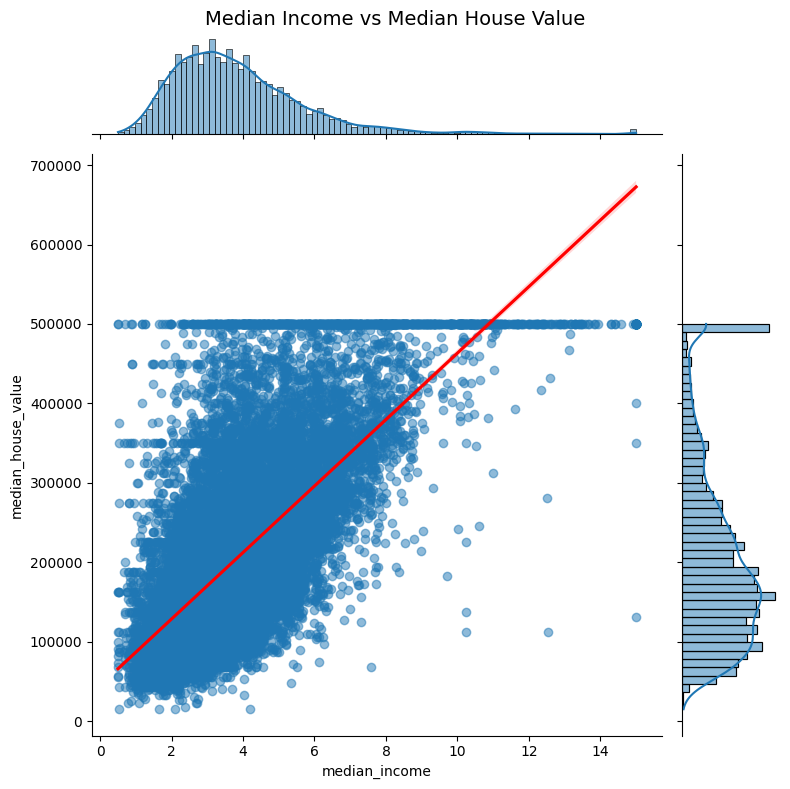

In [77]:
# Create jointplot with regression line
sns.jointplot(
    data=housing_df,
    x="median_income",
    y="median_house_value",
    kind="reg",       # adds a regression line
    height=8,         # size of the plot
    scatter_kws={'alpha':0.5},  # transparency for clarity
    line_kws={'color': 'red'}  # regression line color
)

plt.suptitle("Median Income vs Median House Value", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # adjust title spacing
plt.show()

5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

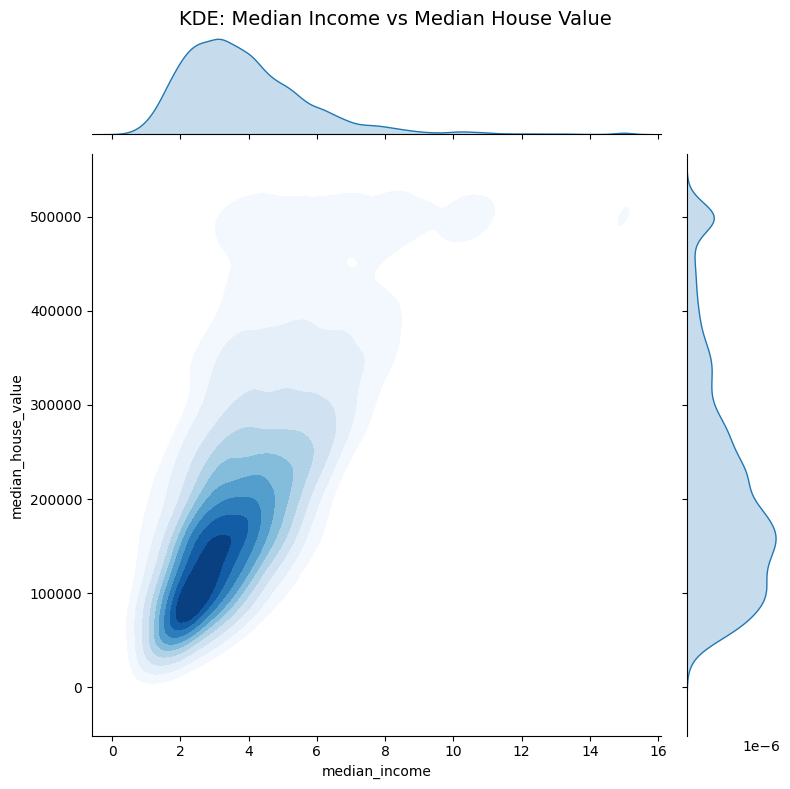

In [82]:
# Create jointplot but parameter as kde
sns.jointplot(
    data=housing_df,              # your DataFrame
    x="median_income",            # variable for x-axis
    y="median_house_value",       # variable for y-axis
    kind="kde",                   # KDE = kernel density estimate
    height=8,                     # figure size in inches
    fill=True,                    # fill the contours with color
    cmap="Blues"                  # color map for the contours
)

# Add a title above the plot
plt.suptitle("KDE: Median Income vs Median House Value", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # space for the title
plt.show()

#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [83]:
def median_income_classification (income):
    q1 = housing_df['median_income'].quantile(0.25)
    q2 = housing_df['median_income'].quantile(0.50)
    q3 = housing_df['median_income'].quantile(0.75)
    q4 = housing_df['median_income'].quantile(0.95)
    q5 = housing_df['median_income'].quantile(1)
    
    if income < q1:
        return "Low"
    elif q1 <= income < q2:
        return "Below_Average"
    elif q2 <= income < q3:
        return "Above_Average"
    elif q3 <= income < q4:
        return "High"
    elif q4 <= income < q5:
        return "Very High"
    
housing_df['income_cat'] = housing_df['median_income'].map(median_income_classification)

housing_df.head()
    

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_hh,population_per_hh,bedrooms_per_room,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591,Very High
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797,Very High
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096,Above_Average


2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

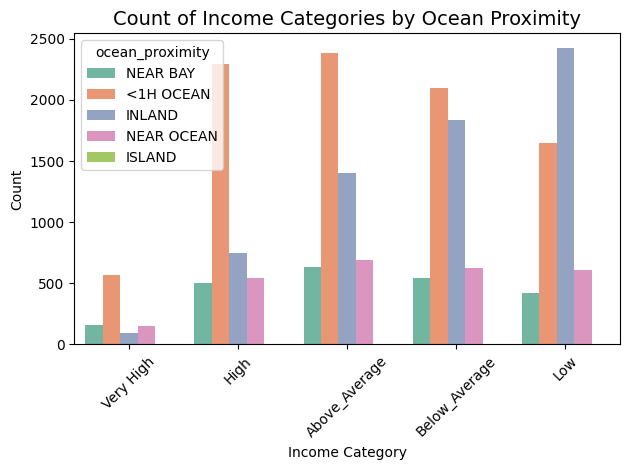

np.int64(5)

In [90]:
# Count plot of a categorical column with hue based on 'ocean_proximity'
sns.countplot(
    data=housing_df,
    x="income_cat",        # replace with your actual column name
    hue="ocean_proximity",      # color differentiation by proximity to ocean
    palette="Set2"              # optional color palette
)

plt.title("Count of Income Categories by Ocean Proximity", fontsize=14)
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

(housing_df['ocean_proximity'] == "ISLAND").sum()

In [ ]:
#Based on the above graph, I can observe that the higher the median income category, 
# the lower the % oh households located "INLAND". 
# Also, I can see that there are almost no occurrences for any median income category for "ISLAND" ocean proximity value (only 5 in total). 

3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

C:\Users\jefit\AppData\Local\Temp\ipykernel_20024\426417557.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


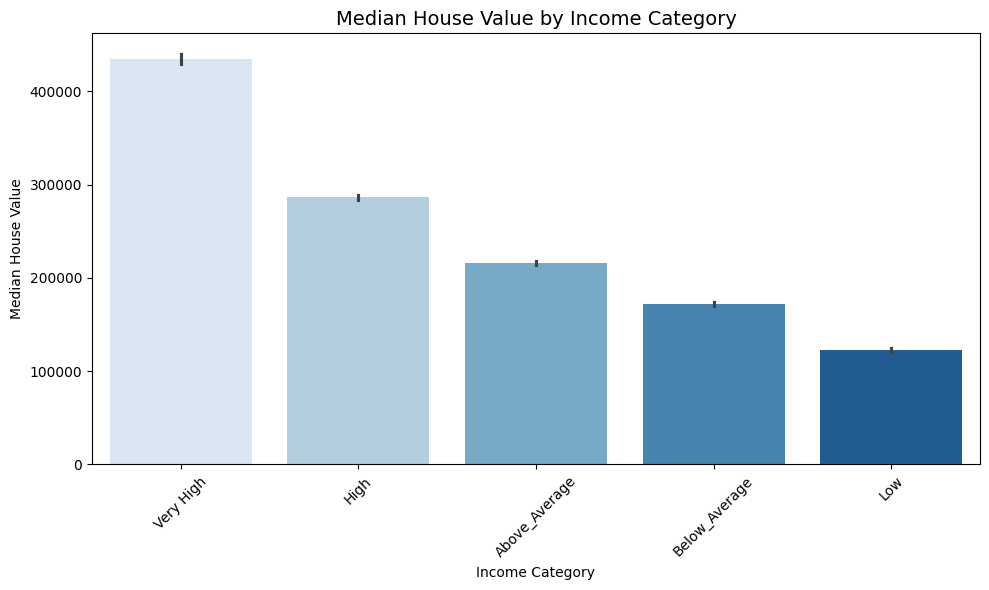

In [86]:
# Barplot 1: Median house value by income category
plt.figure(figsize=(10, 6))
sns.barplot(
    data=housing_df,
    x="income_cat",               # Replace with your column if different
    y="median_house_value",
    palette="Blues"
)
plt.title("Median House Value by Income Category", fontsize=14)
plt.xlabel("Income Category")
plt.ylabel("Median House Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\jefit\AppData\Local\Temp\ipykernel_20024\1416074905.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


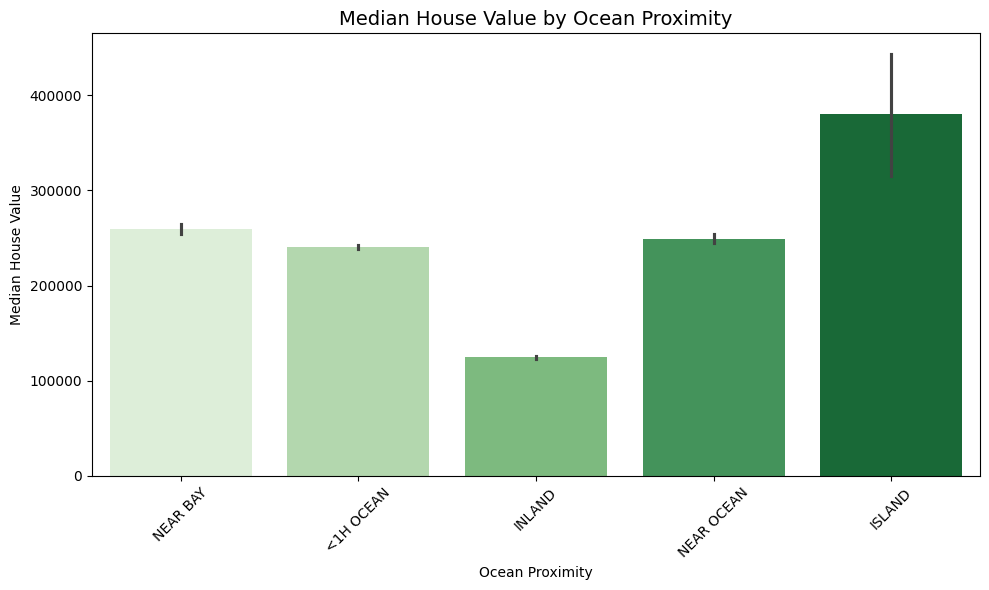

In [88]:
# Barplot 2: Median house value by ocean proximity
plt.figure(figsize=(10, 6))
sns.barplot(
    data=housing_df,
    x="ocean_proximity",
    y="median_house_value",
    palette="Greens"
)
plt.title("Median House Value by Ocean Proximity", fontsize=14)
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [91]:
#The first bar chart shows that there is a positive correlation between median_income_category and the median_house_value, which makes sense, 
# as the higher the income, they can afford a higher value house. 

#On the other hand, for the second bar chart, we can see that the average median house value is higher for the ones located in an island, 
# followed by 'Near bay' and 'Near Ocean'. The location with the lowest average median house value is 'Inland'.

4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

In [92]:
# Pivot the DataFrame: rows = income_cat, columns = ocean_proximity
pivot_df = pd.crosstab(
    index=housing_df["income_cat"],
    columns=housing_df["ocean_proximity"]
)

# Display the pivoted DataFrame
print(pivot_df)

ocean_proximity  <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
income_cat                                                      
Above_Average         2386    1398       0       631         691
Below_Average         2097    1834       4       546         626
High                  2297     744       0       506         540
Low                   1650    2423       1       422         611
Very High              570      93       0       161         150


In [93]:
# Drop the 'ISLAND' column if it exists
pivot_df = pivot_df.drop(columns="ISLAND")

print(pivot_df)

ocean_proximity  <1H OCEAN  INLAND  NEAR BAY  NEAR OCEAN
income_cat                                              
Above_Average         2386    1398       631         691
Below_Average         2097    1834       546         626
High                  2297     744       506         540
Low                   1650    2423       422         611
Very High              570      93       161         150


5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

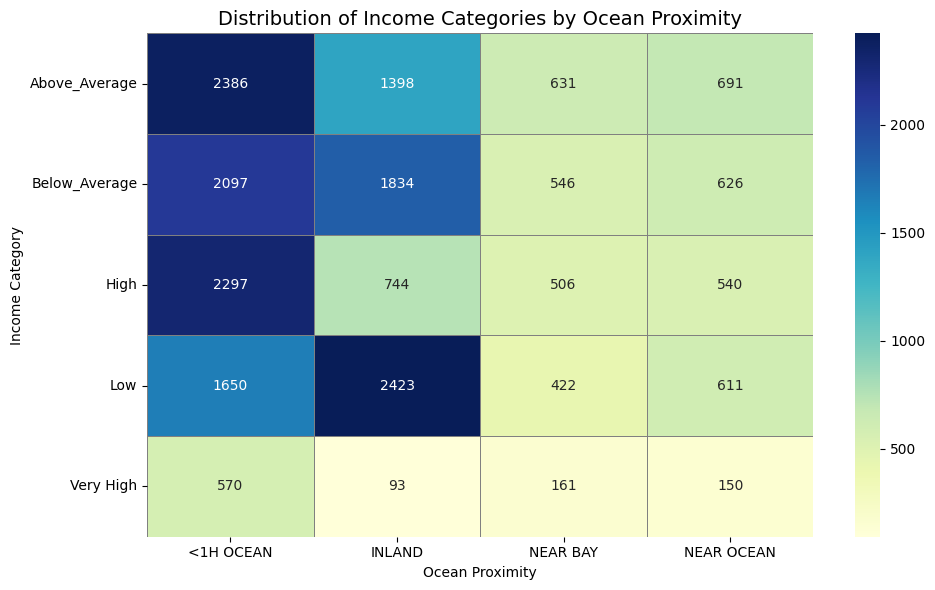

In [94]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_df,                 # your pivoted DataFrame
    annot=True,               # show annotations
    fmt="d",                  # integer formatting
    cmap="YlGnBu",            # color palette
    linewidths=0.5,           # lines between cells
    linecolor="gray"          # line color
)

plt.title("Distribution of Income Categories by Ocean Proximity", fontsize=14)
plt.xlabel("Ocean Proximity")
plt.ylabel("Income Category")
plt.tight_layout()
plt.show()

# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

In [95]:
housing_df.drop('income_cat', axis=1, inplace=True)

housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_hh',
       'population_per_hh', 'bedrooms_per_room'],
      dtype='object')

2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`. 

In [96]:
import scipy.stats as stats

# Select only float-type columns
float_cols = housing_df.select_dtypes(include=["float64"])

# Apply Z-score standardization
z_scored = float_cols.apply(lambda x: stats.zscore(x, nan_policy='omit'))

# Display first few rows
print(z_scored.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327178  1.051835            0.982245    -0.803953       -0.970467   
1  -1.322187  1.042473           -0.606063     2.041934        1.348104   
2  -1.332169  1.037792            1.855815    -0.535335       -0.825704   
3  -1.337160  1.037792            1.855815    -0.623654       -0.718913   
4  -1.337160  1.037792            1.855815    -0.462117       -0.612121   

   population  households  median_income  median_house_value  rooms_per_hh  \
0   -0.973604   -0.977135       2.344991            2.129043      0.741063   
1    0.861142    1.670222       2.332460            1.313782      0.387873   
2   -0.820046   -0.843721       1.782799            1.258334      1.358446   
3   -0.765330   -0.733850       0.932878            1.164766      0.188652   
4   -0.759153   -0.629212      -0.013181            1.172563      0.408571   

   population_per_hh  bedrooms_per_room  
0          -0.049440          -1.15119

3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

In [97]:
# Step 1: Identify categorical columns (e.g., object or category dtype)
cat_cols = housing_df.select_dtypes(include=["object", "category"]).columns

# Step 2: Convert categorical columns to dummies, dropping the first column of each to avoid multicollinearity
housing_dummies = pd.get_dummies(housing_df[cat_cols], drop_first=True)

# Step 3: Concatenate the dummy columns back to the original (excluding the original categorical columns)
housing_df_encoded = pd.concat([housing_df.drop(columns=cat_cols), housing_dummies], axis=1)

# Display the result
print(housing_df_encoded.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  rooms_per_hh  \
0       322.0       126.0         8.3252            452600.0      6.984127   
1      2401.0      1138.0         8.3014            358500.0      6.238137   
2       496.0       177.0         7.2574            352100.0      8.288136   
3       558.0       219.0         5.6431            341300.0      5.817352   
4       565.0       259.0         3.8462            342200.0      6.281853   

   population_per_hh  bedrooms_per_room  ocean_proximity_INLAND  \
0           2

4. Save our predicting variable to `y`.

In [98]:
y = housing_df_encoded['median_house_value']

5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

In [100]:
concatenated_df = pd.concat([z_scored, housing_dummies], axis=1)

X = concatenated_df.drop('median_house_value', axis=1)


X.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_hh', 'population_per_hh', 'bedrooms_per_room',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

# Part 4 - Machine Learning 




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model. 

In [107]:
#Building the model
california_housing_model = LinearRegression()



In [108]:
#Fitting and training the model
california_housing_model.fit(X_train, y_train)

LinearRegression()

3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look? 

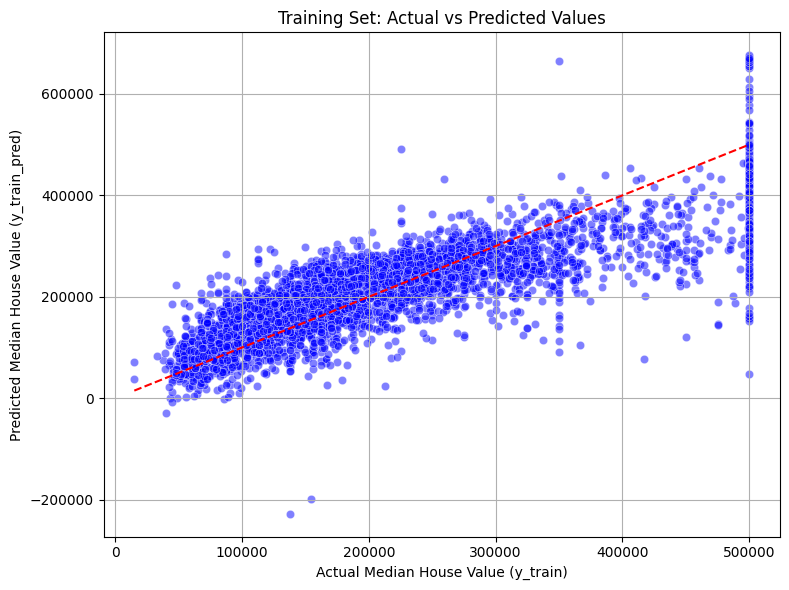

In [109]:
# get y_train prediction:

y_train_pred = california_housing_model.predict(X_train)

# Scatter plot: actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.5, color='blue')

# Add 45-degree reference line (perfect prediction)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')

plt.xlabel("Actual Median House Value (y_train)")
plt.ylabel("Predicted Median House Value (y_train_pred)")
plt.title("Training Set: Actual vs Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [110]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_train, y_train_pred))
print("R²:", r2_score(y_train, y_train_pred))

MSE: 4686194328.339502
R²: 0.6470077576081147


In [ ]:
#Mean squared error is extremely high, but as the dependent variable is house prices in dollars, it is normal to have a cosniderably high MSE.

In [ ]:
# On the other hand, a r_squared of 0.647 is quite good. It means that the current model we have, explains 64% of the median_house_value value. 

#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

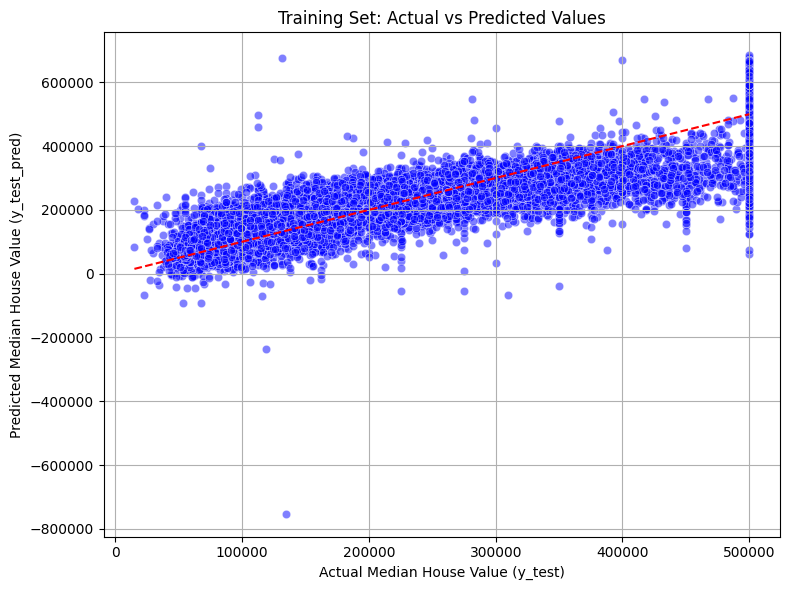

In [111]:
# get y_test prediction:

y_test_pred = california_housing_model.predict(X_test)

# Scatter plot: actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5, color='blue')

# Add 45-degree reference line (perfect prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel("Actual Median House Value (y_test)")
plt.ylabel("Predicted Median House Value (y_test_pred)")
plt.title("Training Set: Actual vs Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

2. Print the mean_squared_error and R^2-score again. What has happened?

In [112]:
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R²:", r2_score(y_test, y_test_pred))

MSE: 4607469669.687382
R²: 0.6544621305158624


3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

In [113]:
from sklearn.metrics import root_mean_squared_error

print("RMSE:", root_mean_squared_error(y_test, y_test_pred))

RMSE: 67878.34462984039


# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

In [114]:
# Assuming y_test and y_test_pred already exist
results_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_test_pred
})

# Display the first few rows
print(results_df.head())

         Actual      Predicted
17085  202800.0  185716.414353
1590   382200.0  376271.820415
1724    69800.0  159812.976572
5200    94200.0  120049.662165
12394  318100.0  361362.124134


2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

In [115]:
absolute_errors = (results_df["Actual"] - results_df["Predicted"]).abs()

# Display the first few values of the absolute errors
print(absolute_errors.head())

17085    17083.585647
1590      5928.179585
1724     90012.976572
5200     25849.662165
12394    43262.124134
dtype: float64


3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

In [118]:
from sklearn.metrics import mean_absolute_error

print(absolute_errors.mean())

print("Mean Absolute Errors:", mean_absolute_error(y_test, y_test_pred))

49408.529114649784
Mean Absolute Errors: 49408.529114649784


# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
random_forest_model = RandomForestRegressor()

In [122]:
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [123]:
y_train_pred_rf = random_forest_model.predict(X_train) 

In [124]:
# Evaluate on train data
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

print("Random Forest Regressor Performance:")
print("MSE:", mse_train_rf)
print("R² Score:", r2_train_rf)

Random Forest Regressor Performance:
MSE: 433790426.77395236
R² Score: 0.9673243052365419


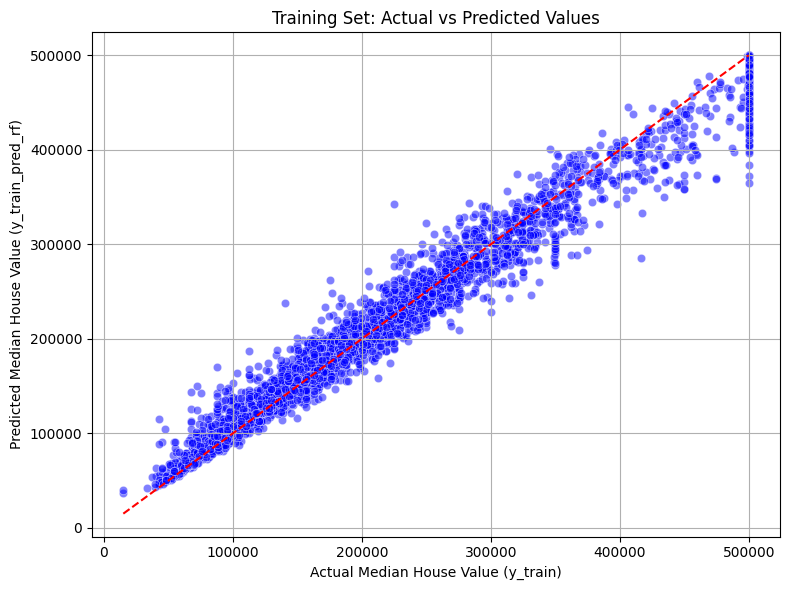

In [125]:

# Scatter plot: actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=y_train_pred_rf, alpha=0.5, color='blue')

# Add 45-degree reference line (perfect prediction)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')

plt.xlabel("Actual Median House Value (y_train)")
plt.ylabel("Predicted Median House Value (y_train_pred_rf)")
plt.title("Training Set: Actual vs Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

2. Make prediction on the test data and evaluate you results.

In [126]:
y_test_pred_rf = random_forest_model.predict(X_test)

In [127]:
# Evaluate on test data
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print("Random Forest Regressor Performance:")
print("MSE:", mse_test_rf)
print("R² Score:", r2_test_rf)

Random Forest Regressor Performance:
MSE: 2961265792.1223693
R² Score: 0.7779194338449879


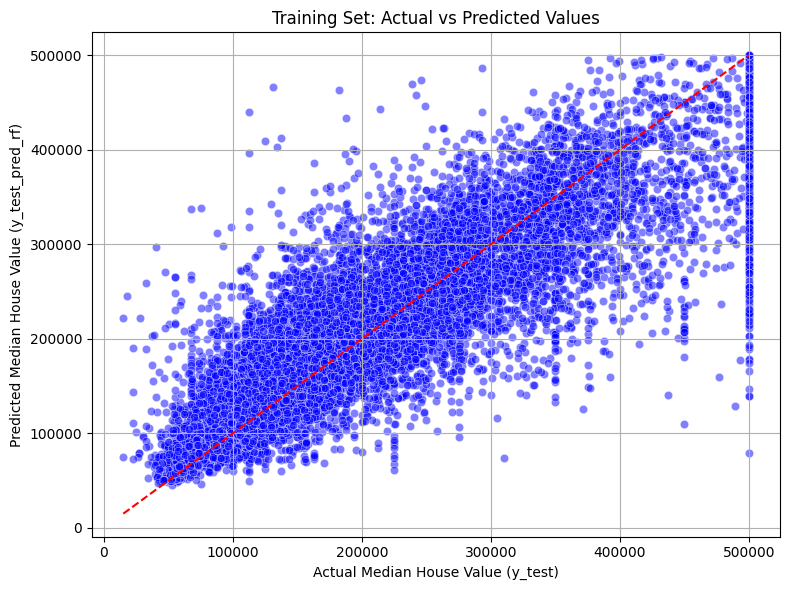

In [128]:

# Scatter plot: actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred_rf, alpha=0.5, color='blue')

# Add 45-degree reference line (perfect prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel("Actual Median House Value (y_test)")
plt.ylabel("Predicted Median House Value (y_test_pred_rf)")
plt.title("Training Set: Actual vs Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()